# Imports/Data reading

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

In [5]:
top50_df = pd.read_csv("top50.csv", encoding='ISO-8859-1', index_col=0)
top50_df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
# info on null fields in data
top50_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 13 columns):
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(10), object(3)
memory usage: 5.5+ KB


In [7]:
cat_cols = ['Track.Name', 'Artist.Name', 'Genre']
int_cols = [name for name in top50_df.columns if top50_df[name].dtype in ['int64']]

### Data cleaning

In [8]:
# standardise all int64 columns to same scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
transformed = pd.DataFrame(scaler.fit_transform(top50_df[int_cols]), columns=int_cols, index=top50_df.index)

In [9]:
# join back with categorical columns
top50_scaled = top50_df[cat_cols].join(transformed)

In [10]:
top50_scaled.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
1,Señorita,Shawn Mendes,canadian pop,0.304762,0.410714,0.770492,0.555556,0.056604,0.764706,0.391753,0.040541,0.000000,0.36
2,China,Anuel AA,reggaeton flow,0.190476,0.875000,0.819672,0.777778,0.056604,0.600000,0.963918,0.094595,0.139535,0.88
3,boyfriend (with Social House),Ariana Grande,dance pop,1.000000,0.857143,0.180328,0.777778,0.207547,0.705882,0.365979,0.148649,1.000000,0.60
4,Beautiful People (feat. Khalid),Ed Sheeran,pop,0.076190,0.589286,0.573770,0.333333,0.056604,0.529412,0.427835,0.148649,0.372093,0.64
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,0.619048,0.589286,0.475410,0.777778,0.113208,0.094118,0.309278,0.594595,0.093023,0.96


## Descriptive info

In [11]:
top50_scaled[cat_cols].describe()

,Track.Name,Artist.Name,Genre
count,50,50,50
unique,50,38,21
top,China,Ed Sheeran,dance pop
freq,1,4,8


<div class='alert alert-info'>
    
In 2019, `Ed Sheeran` was the most popular artist with 4 of his songs being in the top 50. While the most popular genre turns out to be `dance pop`.

</div>

In [12]:
top50_scaled.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,0.333905,0.572500,0.694754,0.593333,0.182264,0.524706,0.443093,0.285946,0.220465,0.70000
std,0.294270,0.254141,0.195572,0.228494,0.209779,0.262777,0.201773,0.256697,0.259572,0.17966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.104762,0.415179,0.622951,0.472222,0.056604,0.332353,0.318299,0.097973,0.046512,0.64000
50%,0.185714,0.616071,0.729508,0.555556,0.113208,0.535294,0.427835,0.189189,0.093023,0.72000
75%,0.500000,0.763393,0.831967,0.777778,0.202830,0.700000,0.528351,0.442568,0.279070,0.83000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [211]:
# sns.distplot(a=top50_scaled['Energy'], kde=True, bins=10)

In [212]:
# sns.distplot(a=top50_scaled['Valence.'], kde=True, bins=10)

<div class='alert alert-info'>

In general, the top 50 songs have high `Energy`, `Danceability`, `Loudness`. They have a neutral vibe since `Valence` hovers at 0.5 range. The length of each song is about 3 minutes plus. Surprisingly, majority of the popular songs do not have high `Beats Per Minute`.
<br><br>
    
However, they do not have much `Acousticness` with a skewed mean from the max value. They tend not to have much words inside them as well (from the low mean of `Speechiness`).
</div>

# Relationship between most popular songs

In [216]:
# sort by popularity
top50_sorted = top50_scaled.sort_values('Popularity', ascending=False)

# Top 10 songs 
top50_sorted.head(10)

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
10,bad guy,Billie Eilish,electropop,0.476190,0.196429,0.672131,0.000000,0.094340,0.541176,0.407216,0.432432,0.813953,1.00
5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,0.619048,0.589286,0.475410,0.777778,0.113208,0.094118,0.309278,0.594595,0.093023,0.96
11,Callaita,Bad Bunny,reggaeton,0.866667,0.535714,0.524590,0.666667,0.358491,0.164706,0.701031,0.797297,0.651163,0.92
15,Money In The Grave (Drake ft. Rick Ross),Drake,canadian hip hop,0.152381,0.321429,0.885246,0.777778,0.132075,0.000000,0.463918,0.121622,0.046512,0.88
2,China,Anuel AA,reggaeton flow,0.190476,0.875000,0.819672,0.777778,0.056604,0.600000,0.963918,0.094595,0.139535,0.88
7,Ransom,Lil Tecca,trap music,0.904762,0.571429,0.754098,0.555556,0.037736,0.152941,0.082474,0.013514,0.604651,0.88
37,Otro Trago,Sech,panamanian pop,0.866667,0.678571,0.754098,0.666667,0.113208,0.611765,0.572165,0.175676,0.720930,0.84
22,Panini,Lil Nas X,country rap,0.657143,0.482143,0.672131,0.555556,0.132075,0.447059,0.000000,0.445946,0.116279,0.84
21,Piece Of Your Heart,MEDUZA,pop house,0.371429,0.750000,0.639344,0.444444,0.037736,0.623529,0.195876,0.040541,0.000000,0.84
20,Truth Hurts,Lizzo,escape room,0.695238,0.535714,0.704918,0.888889,0.132075,0.364706,0.298969,0.135135,0.186047,0.84


### Categorical feature relationships (Top 50)

In [16]:
# counts of each genres in Top 50 with more than 1 song
top50_scaled['Genre'].value_counts()[top50_scaled['Genre'].value_counts()>1]

dance pop           8
pop                 7
latin               5
edm                 3
canadian hip hop    3
electropop          2
dfw rap             2
panamanian pop      2
brostep             2
canadian pop        2
country rap         2
reggaeton flow      2
reggaeton           2
Name: Genre, dtype: int64

<div class='alert alert-info'>

`dance pop`, `pop` and `latin` are some of the most popular genres in the Top 50 songs.
</div>

In [17]:
# plt.figure(figsize=(10,5))
# top_genres = top50_scaled[top50_scaled['Genre'].isin(top50_scaled['Genre'].value_counts()[top50_scaled['Genre'].value_counts()>1].index)]
# sns.countplot(top_genres['Genre'], color='lightblue')
# plt.title("Songs per genre in Top 50")
# plt.xticks(rotation=90)

In [18]:
# counts of each artist in Top 50 with more than 1 song
top50_scaled['Artist.Name'].value_counts()[top50_scaled['Artist.Name'].value_counts()>1]

Ed Sheeran          4
Lil Nas X           2
Sech                2
J Balvin            2
Marshmello          2
Post Malone         2
Ariana Grande       2
The Chainsmokers    2
Billie Eilish       2
Shawn Mendes        2
Name: Artist.Name, dtype: int64

<div class='alert alert-info'>

`Ed Sheeran` is the most popular artist with the most songs in the Top 50. While the remaining artists have either 1 or 2 songs in this list. 
</div>

In [19]:
# count of songs per artist
# plt.figure(figsize=(10,5))
# top_artists = top50_scaled[top50_scaled['Artist.Name'].isin(top50_scaled['Artist.Name'].value_counts()[top50_scaled['Artist.Name'].value_counts()>1].index)]
# sns.countplot(top_artists['Artist.Name'], color='lightgreen')
# plt.title("Songs per artist in Top 50")
# plt.xticks(rotation=90)

### Numeric feature relationships (Top 50)

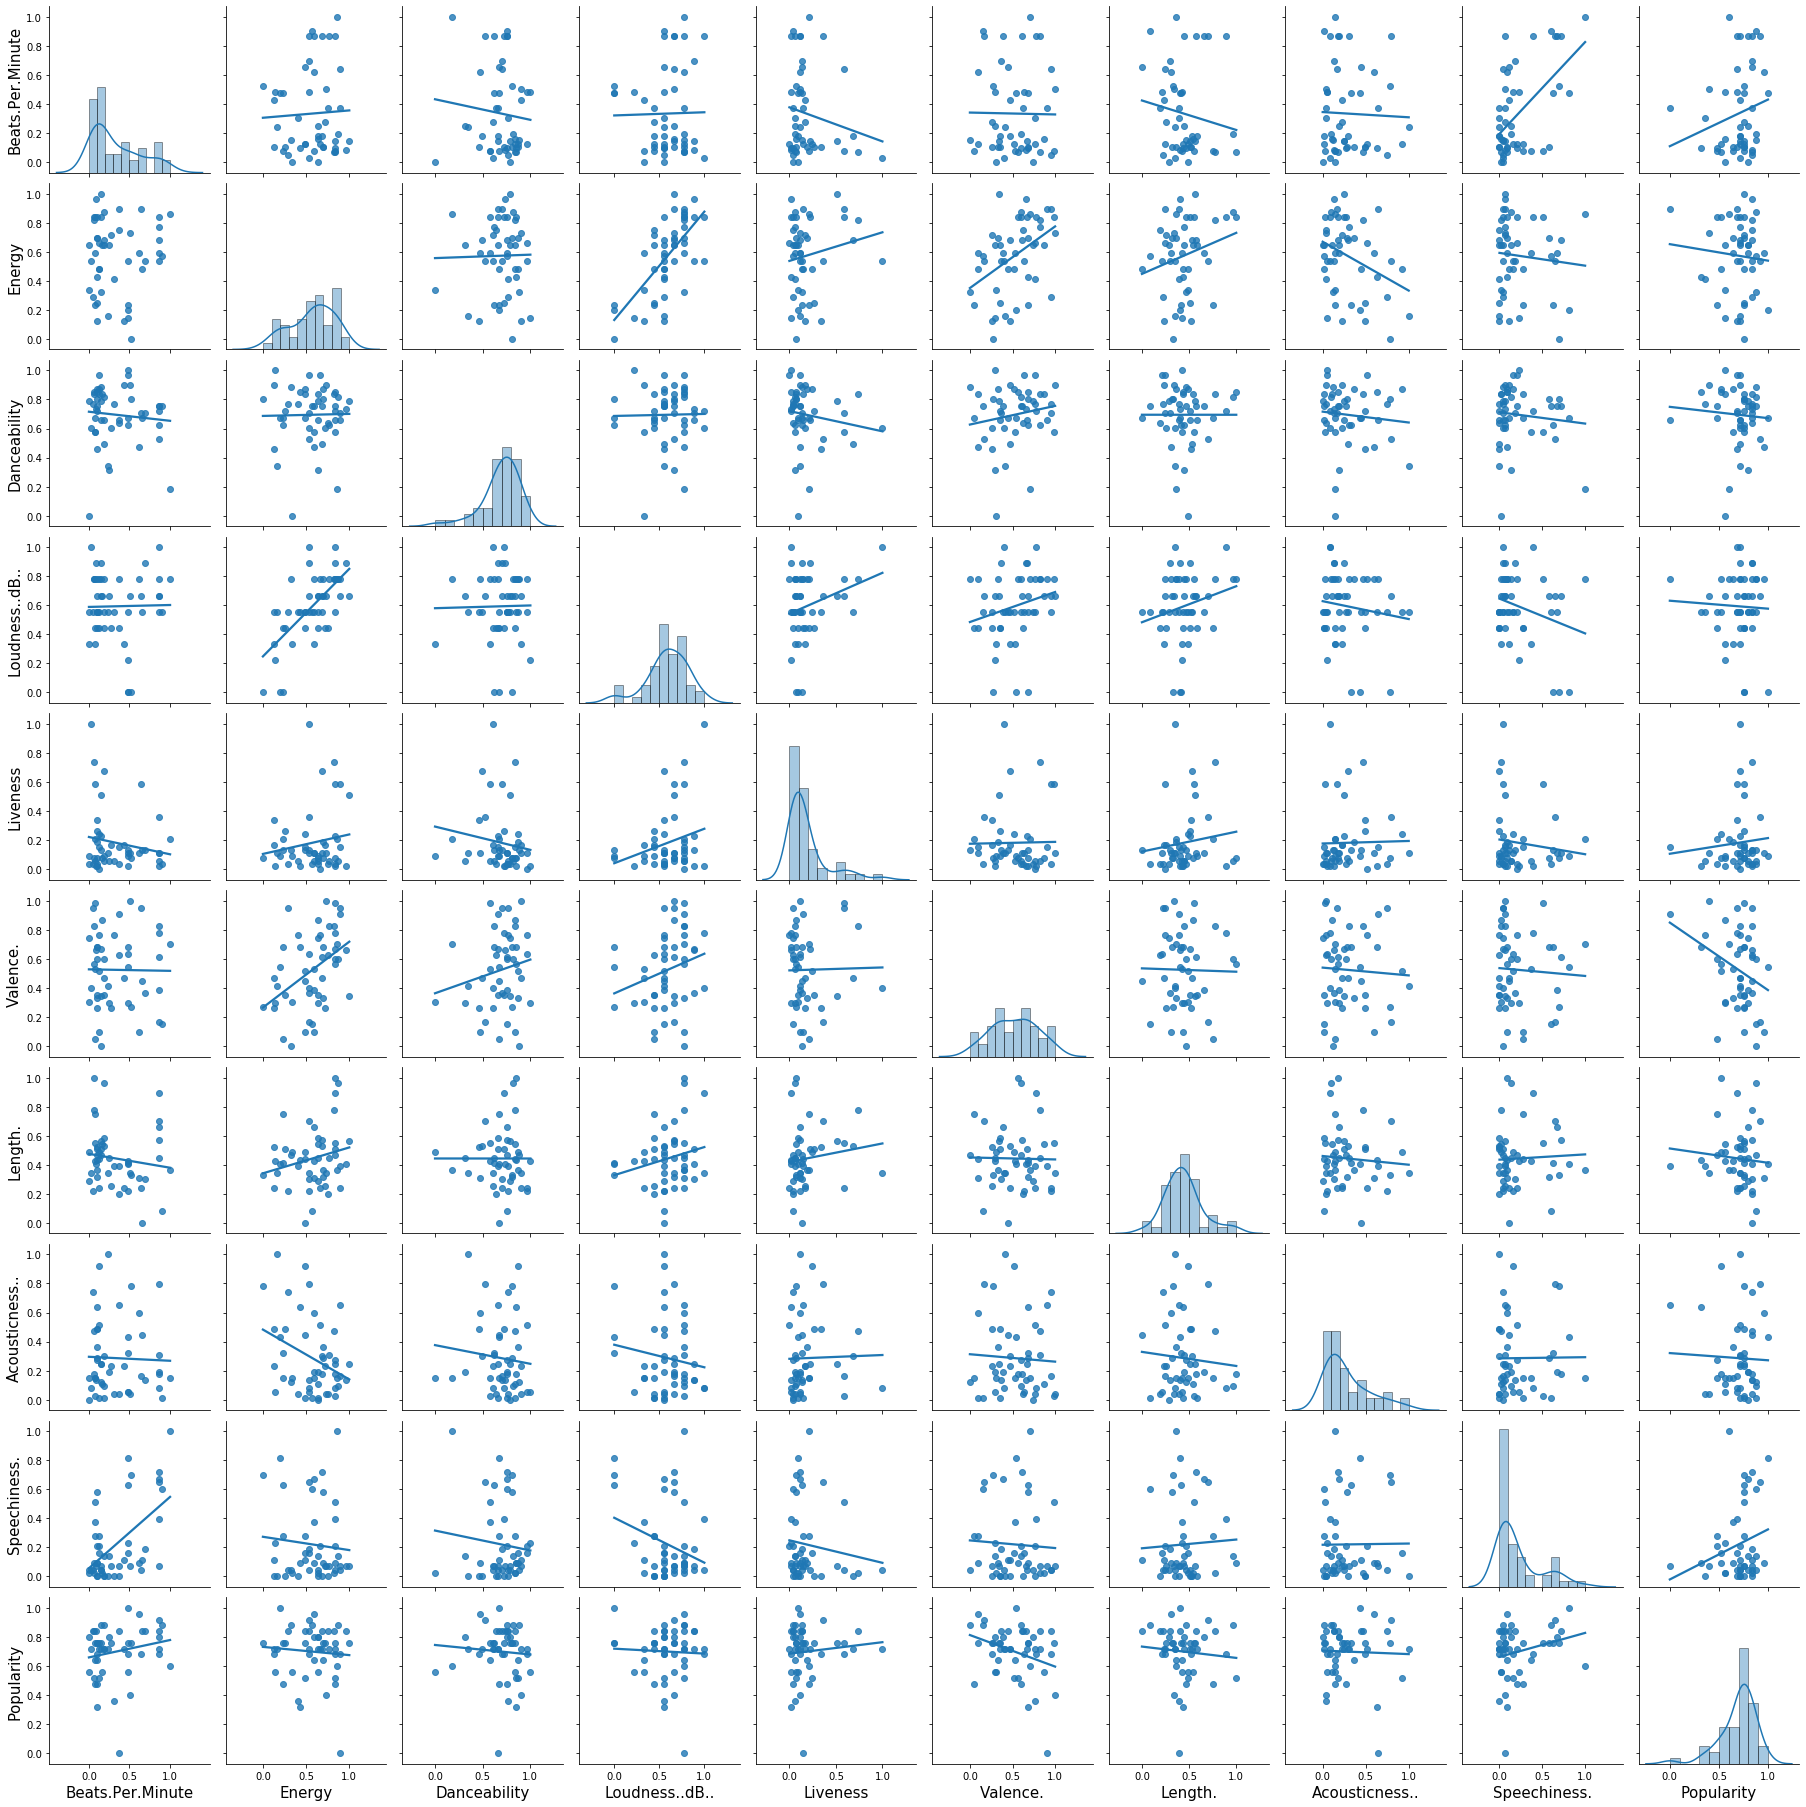

In [196]:
# Distributions and relationship between features (pairwise)
g2 = sns.PairGrid(top50_scaled[int_cols])
g2.map_offdiag(sns.regplot, ci=None)
g2.map_diag(sns.distplot, bins=10)

for axes in g2.axes.flat:
    axes.xaxis.label.set_size(15)
    axes.yaxis.label.set_size(15)

<div class='alert alert-info'>

From the pair grid, we can see the relationships between features pairwise and their distributions. We see that `Energy`, `Loudness`, `Danceability`, `Valence`, `Length` have a relatively normal distribution. While `Liveness`, `Acousticness`, `Speechiness` are right skewed. Although `Popularity` seems to be normally distributed, it is slightly left skewed, with more songs having a popularity of between 0.7 ~ 0.9 range. This is expected to even out to a normal distribution if we expand the top songs to a larger value.
</div>

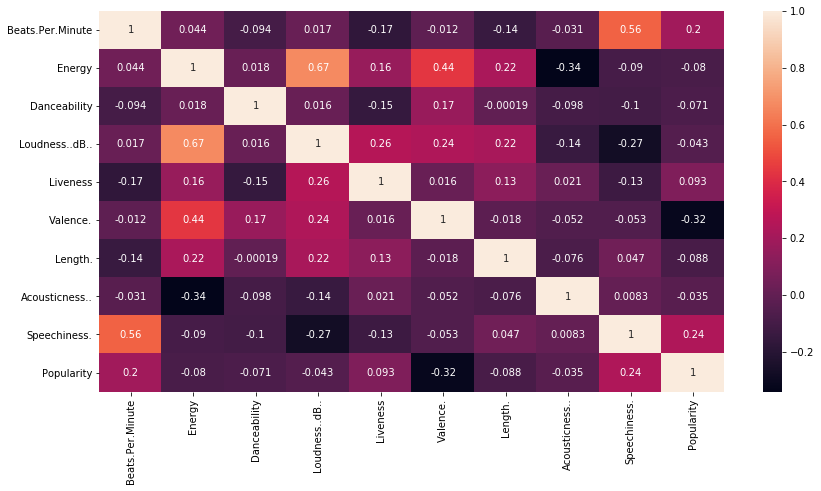

In [217]:
# correlations heatmap
correlations2 = top50_scaled[int_cols].corr()
plt.figure(figsize=(14,7))
sns.heatmap(data=correlations2, annot=True)

<div class='alert alert-info'>

There are a few features that have a positive correlation. These includes `Loudness`, `Energy`, `Speechiness`, `Beats Per Minute`, `Valence`. 

However these features do not have a noticable correlation with popularity of a song. Features that have a weak positive correlation includes `Beats Per Minute` and `Speechiness`. Feature that have a weak negative correlation includes `Valence`. 
</div>

### Categorical feature relationships (Top 10)

In [20]:
# top 10 songs
top10_songs = top50_sorted.iloc[:10,]

In [21]:
# get top 10 artist songs
top10_art = top10_songs['Artist.Name'].unique().tolist()

# get top 10 genre songs
top10_gen = top10_songs['Genre'].unique().tolist()

In [55]:
print("Artists that appeared in Top 10 songs:")
for idx, art in enumerate(top10_art):
    print("{}. {}".format(idx+1, art))
    
print()

print("Genres that appeared in Top 10 songs:")
for idx, gen in enumerate(top10_gen):
    print("{}. {}".format(idx+1, gen))

Artists that appeared in Top 10 songs:
1. Billie Eilish
2. Post Malone
3. Bad Bunny
4. Drake
5. Anuel AA
6. Lil Tecca
7. Sech
8. Lil Nas X
9. MEDUZA
10. Lizzo

Genres that appeared in Top 10 songs:
1. electropop
2. dfw rap
3. reggaeton
4. canadian hip hop
5. reggaeton flow
6. trap music
7. panamanian pop
8. country rap
9. pop house
10. escape room


<div class='alert alert-info'>

Surprisingly, the most popular artist (`Ed Sheeran`) is not in the top 10 songs. This is the same with Genres. 
</div>

### Numeric feature relationships (Top 10)

In [37]:
# Distributions and relationship between features (pairwise)
# from pandas.plotting import scatter_matrix

# scatter_matrix(top10_songs[int_cols], hist_kwds={'bins':10})
# plt.gcf().set_size_inches(30, 30)
# plt.show()

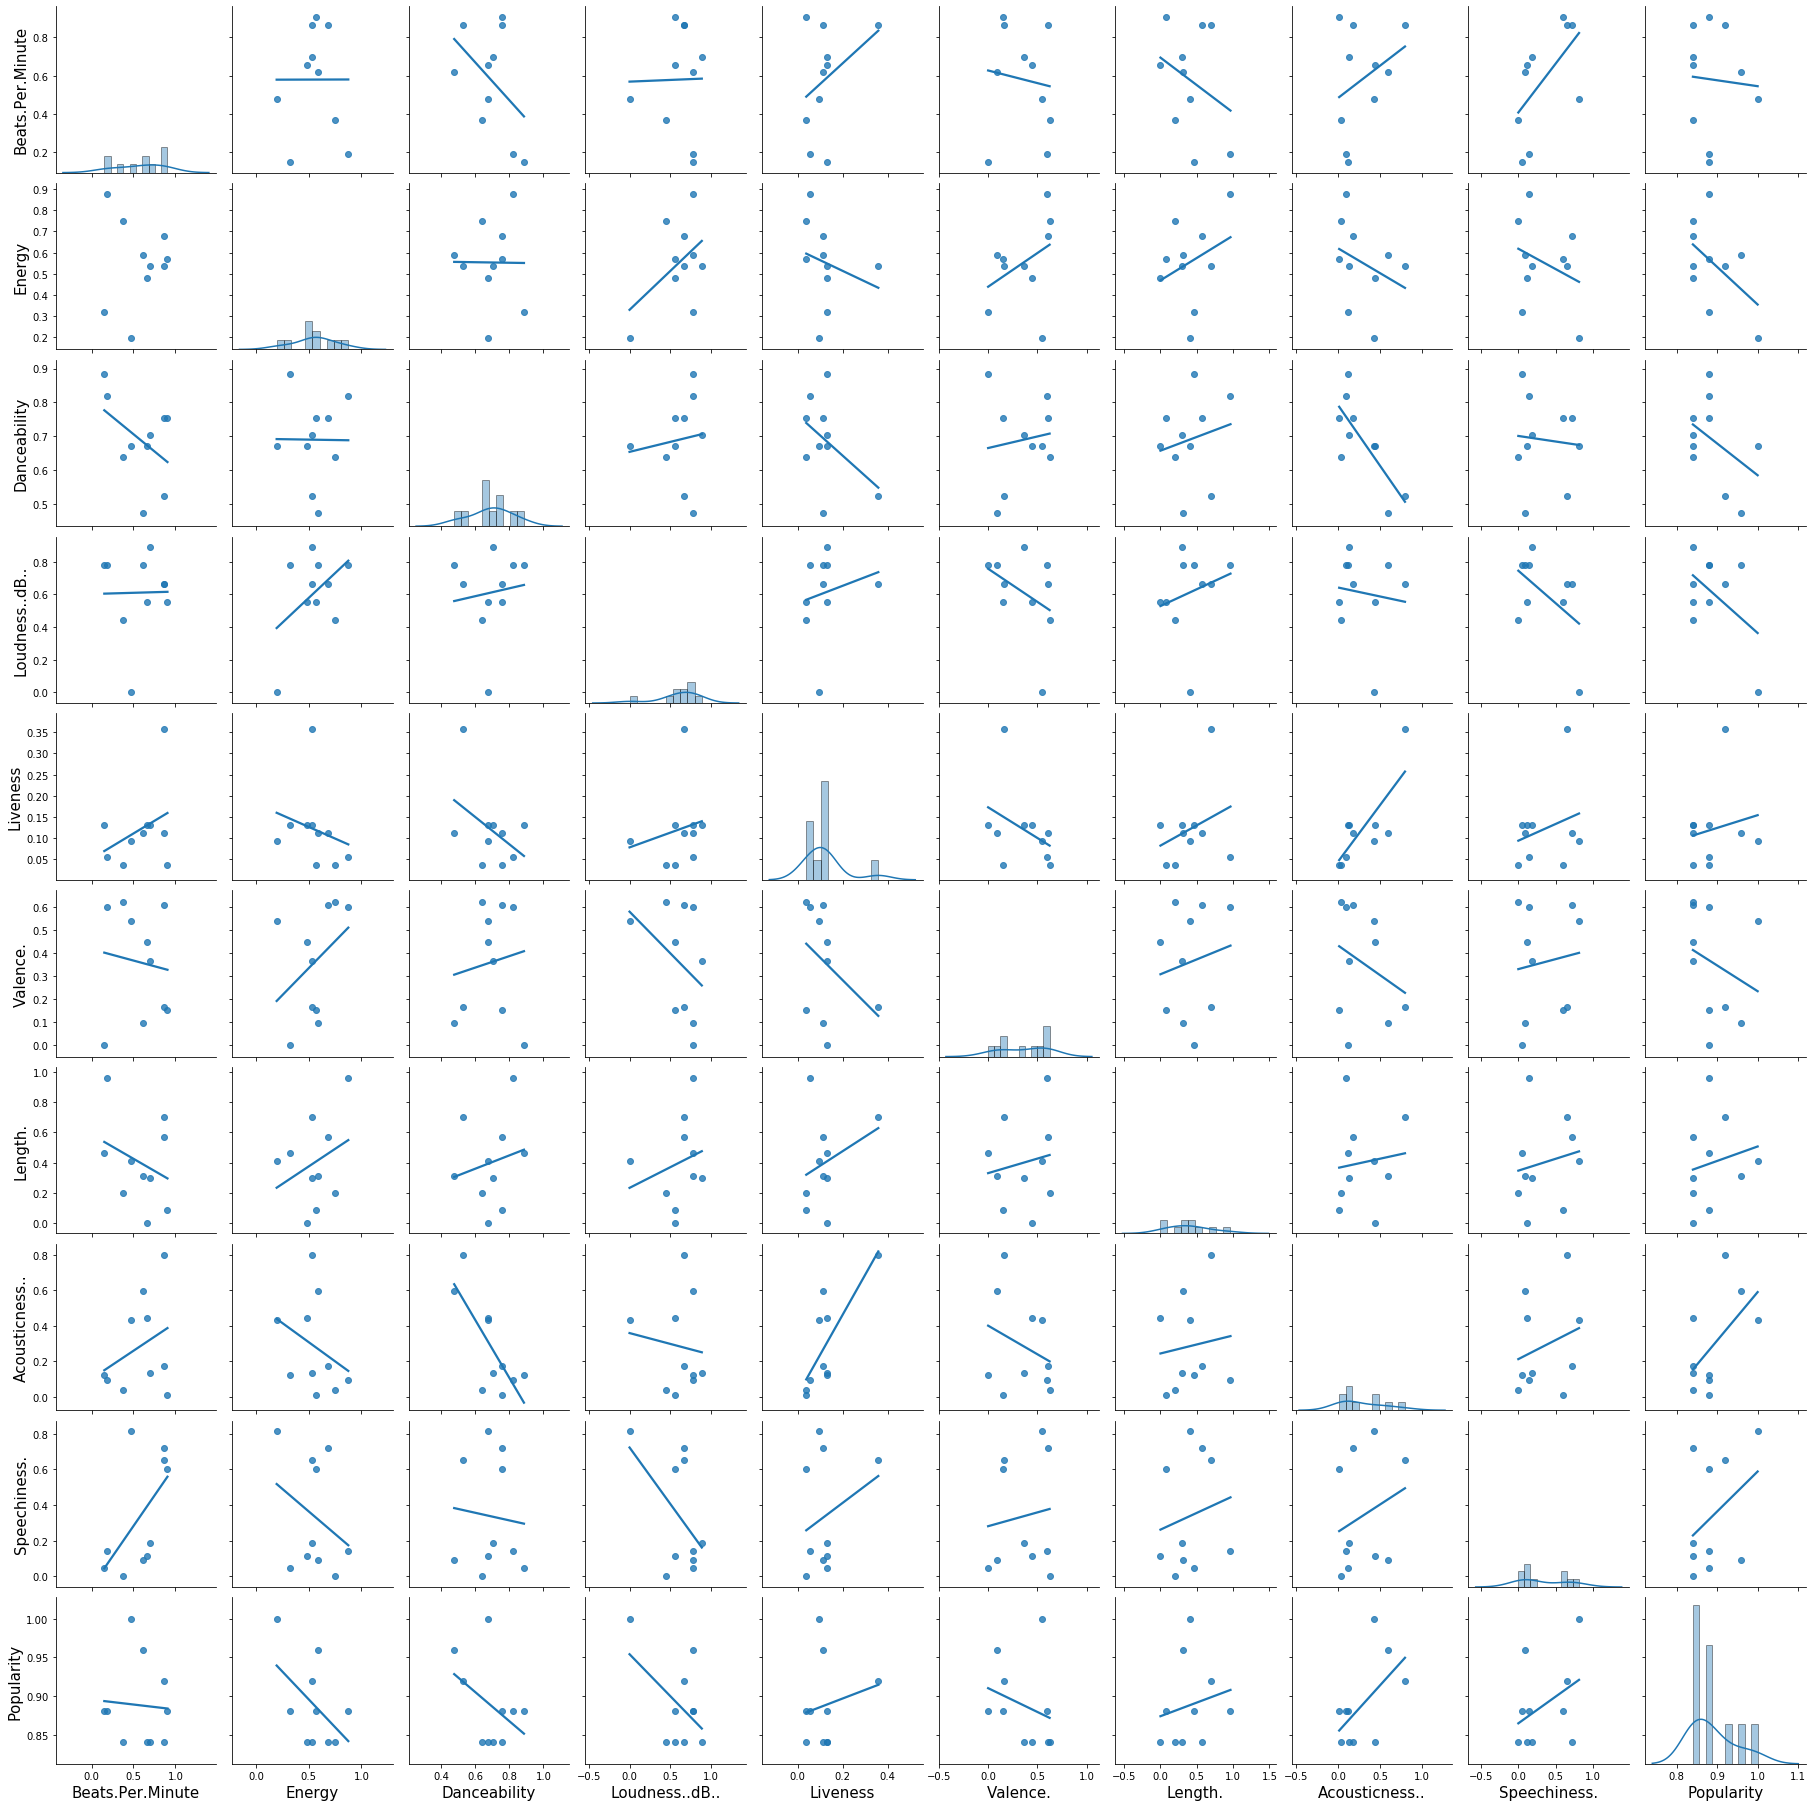

In [63]:
# Distributions and relationship between features (pairwise)
g = sns.PairGrid(top10_songs[int_cols])
g.map_offdiag(sns.regplot, ci=None)
g.map_diag(sns.distplot, bins=10)

for axes in g.axes.flat:
    axes.xaxis.label.set_size(15)
    axes.yaxis.label.set_size(15)

<div class='alert alert-info'>

At a glance, there seems to be no obvious relationship between any of the features. However, we can see that `Energy`, `Danceability`, `Length` has a normal distribution for the top 10 songs. `Popularity`, `Acousticness`, `Liveness` are right skewed. While `Loudness` is slightly left skewed.
</div>

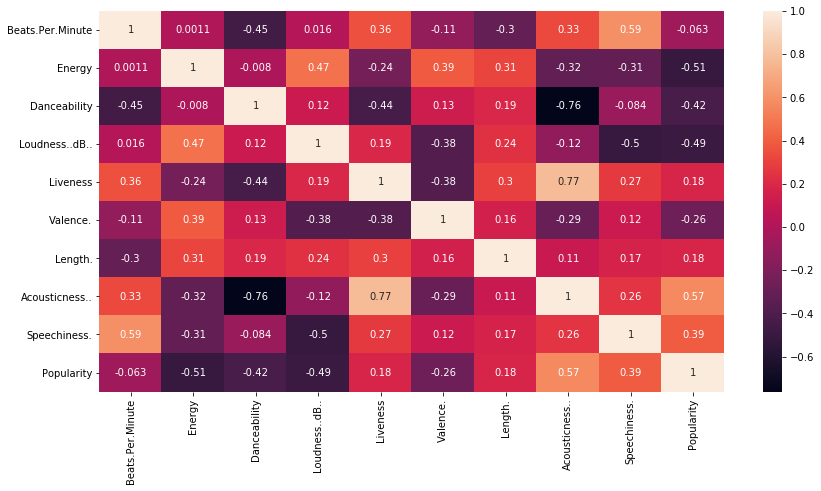

In [109]:
# correlations heatmap
correlations = top10_songs[int_cols].corr()
plt.figure(figsize=(14,7))
sns.heatmap(data=correlations, annot=True)

<div class='alert alert-info'>

Using pandas corr() function, we see most features pairwise has a weak (positive/negative) correlation. `Acousticness` and `Danceability` have a strong negative correlation while `Acousticness` and `Liveness` have a strong positive correlation. 
<br><br>
We also see that a few features are correlated with popularity. Examples are `Energy`, `Danceability`, `Loudness`, `Acousticness` and `Speechiness`. However these features have a moderate correlation with popularity. The rest are either having a weak correlation or no linear correlation at all.
</div>

## Sentiment Analysis on Top 50 song titles

In this section, we will see some of the more prominent words used in titles of the top 50 popular songs. 

In [218]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import string

In [219]:
# stopwords 
stop_words_en = set(stopwords.words("english"))
stop_words_es = set(stopwords.words("spanish"))

# punctuations
punctuations = list(string.punctuation)

In [133]:
## tokenising
titles = top50_scaled['Track.Name'].map(TextBlob)

# print first 5 tokenised titles
for i in range(5):
    print(titles.iloc[i].words)

['Señorita']
['China']
['boyfriend', 'with', 'Social', 'House']
['Beautiful', 'People', 'feat', 'Khalid']
['Goodbyes', 'Feat', 'Young', 'Thug']


In [127]:
sentiments = {}
for i in range(titles.shape[0]):
    sentiments[top50_scaled['Track.Name'].iloc[i]] = titles.iloc[i].sentiment.polarity
    
sentiments = pd.DataFrame(sentiments.values(), index=top50_scaled['Track.Name'], columns=['sentiment'])
sentiments.reset_index(drop=False, inplace=True)
sentiments.head()

,Track.Name,sentiment
0,Señorita,0.000000
1,China,0.000000
2,boyfriend (with Social House),0.033333
3,Beautiful People (feat. Khalid),0.850000
4,Goodbyes (Feat. Young Thug),0.100000


In [130]:
sentiments.describe()

,sentiment
count,50.000000
mean,0.001659
std,0.235479
min,-0.700000
25%,0.000000
50%,0.000000
75%,0.000000
max,0.850000


Text(0.5, 1.0, 'Distribution of sentiment of top 50 song titles')

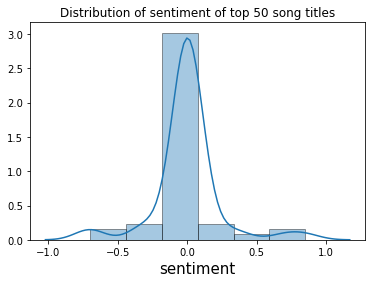

In [220]:
sns.distplot(sentiments['sentiment'], kde=True, bins=6)
plt.title("Distribution of sentiment of top 50 song titles")

<div class='alert alert-info'>

While titles usually express some kind of sentiment about the song, we can see that most songs in the top 50 are neutral in their titles. This could be because most of the emotions are expressed through song lyrics instead. While titles are only an indication of what is to be expected from the song.
</div>

In [193]:
title_str = top50_scaled['Track.Name'].map(nltk.word_tokenize)

# text cleaning - lower caps, stopwords, punctuations
for i in range(title_str.shape[0]):
    title_str.iloc[i] = [w.lower() for w in title_str.iloc[i]]
    title_str.iloc[i] = [w for w in title_str.iloc[i] if w not in punctuations]
    title_str.iloc[i] = [w for w in title_str.iloc[i] if w not in stop_words_en]
    title_str.iloc[i] = [w for w in title_str.iloc[i] if w not in stop_words_es]

# forms long paragraph of string for wordcloud
long_titles = ""
for i in range(title_str.shape[0]):
    temp = " ".join(title_str.iloc[i])
    long_titles = long_titles + " " + temp
    
# remove leading and trailing whitespaces
long_titles = long_titles.strip()
long_titles = long_titles.replace('feat', '').replace('ft.', '')
print(long_titles)

señorita china boyfriend social house beautiful people  khalid goodbyes  young thug n't care justin bieber ransom sleep old town road remix bad guy callaita loco contigo  j. balvin tyga someone loved trago remix money grave drake  rick ross guidance  drake canción sunflower spider-man spider-verse lalala truth hurts piece heart panini conoce remix soltera remix bad guy justin bieber ca n't dance monkey 's calma pretendes takeaway 7 rings 0.958333333333333 london  j. cole travis scott never really summer days  macklemore patrick stump fall boy trago antisocial travis scott sucker fuck 'm lonely anne-marie 13 reasons season 3 higher love need calm shallow talk altura one thing right robaré happier call mine cross  chance rapper pnb rock


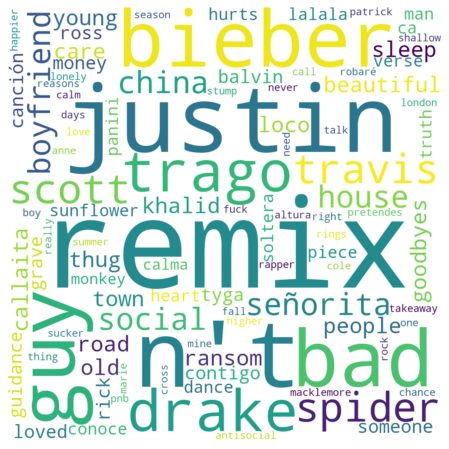

In [194]:
plt.figure(figsize=(12,8))
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1000,
                      height=1000).generate(long_titles)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

<div class='alert alert-info'>

First, we observe that `remix` was used the most in song titles. This makes sense if the remixed song turns out to be better than the original. <br><br>

Second, hypothetically speaking, songs that we can relate to turns out to be more popular. Songs that deal with emotion such as love contain words such as `boyfriend`, `guy`. Singers such as `justin bieber` tends to make more songs about relationships, which is why they are featured in certain song collaborations. 
</div>

# Conclusion

<div class='alert alert-success'>

Having separated songs into top 50 and top 10, we observed that `Speechiness` has a positve correlation with popularity. While `Beats Per Minute` does not correlate with popularity. While the top 10 songs showed that `Energy`, `Danceability`, `Loudness`, `Acousticness` has correlations with popularity, they are mostly songs relating to relationships such as love. <br><br>

This is further supplemented by the result shown sentiment analysis of song titles. Songs titles that contain words relating to relationships or sung by singers associated with emotional songs tend to be more popular. Furthermore, **remixed** songs are also popular with audiences. 
</div>